<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Worlds-Billionaires/blob/main/00_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**World's Billionaires**

Data Source: https://www.kaggle.com/seriadiallo1/world-billionaires

***KPI: The richest people in the world, yearly rank from 2002 to 2021***

author = Hoagonde Amedegnato

email = amereine69@gmail.com


## **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Import Libraries***

In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## ***Load and Read Data***

In [ ]:
billionaires_df = pd.read_csv('/content/drive/MyDrive/billionaires.csv.zip')
billionaires_df

,year,rank,name,net_worth,age,natinality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX"
2,2021,3,Bernard Arnault & family,150.0,72,France,LVMH
3,2021,4,Bill Gates,124.0,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook
...,...,...,...,...,...,...,...
195,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart
197,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile"
198,2002,9,Michael Dell,19.1,35,United States,Dell


In [ ]:
# Correct the column name from "natinality" to "nationality"
billionaires_df.rename(columns = {'natinality':'nationality'}, inplace = True)

In [ ]:
billionaires_df

,year,rank,name,net_worth,age,nationality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX"
2,2021,3,Bernard Arnault & family,150.0,72,France,LVMH
3,2021,4,Bill Gates,124.0,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook
...,...,...,...,...,...,...,...
195,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart
197,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile"
198,2002,9,Michael Dell,19.1,35,United States,Dell


## ***Examine Data***

In [ ]:
# Check the first top 10 rows of billionaires_df using .head() method
billionaires_df.head(10)

,year,rank,name,net_worth,age,nationality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX"
2,2021,3,Bernard Arnault & family,150.0,72,France,LVMH
3,2021,4,Bill Gates,124.0,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook
5,2021,6,Warren Buffett,96.0,90,United States,Berkshire Hathaway
6,2021,7,Larry Ellison,93.0,76,United States,Oracle Corporation
7,2021,8,Larry Page,91.5,48,United States,Alphabet Inc.
8,2021,9,Sergey Brin,89.0,47,United States,Alphabet Inc.
9,2021,10,Mukesh Ambani,84.5,63,India,Reliance Industries


In [ ]:
# Check the bottom 10 rows of billionaires_df using .tail() method
billionaires_df.tail(10)

,year,rank,name,net_worth,age,nationality,source_wealth
190,2002,1,Bill Gates,60.0,44,United States,Microsoft
191,2002,2,Larry Ellison,47.0,55,United States,Oracle Corporation
192,2002,3,Paul Allen,28.0,47,United States,Microsoft
193,2002,4,Warren Buffett,25.6,69,United States,Berkshire Hathaway
194,2002,5,Karl and Theo Albrecht,20.0,80,Germany,Aldi Süd
195,2002,6,Al-Waleed bin Talal,20.0,43,Saudi Arabia,Kingdom Holding Company
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart
197,2002,8,Masayoshi Son,19.4,43,Japan,"Softbank Capital, SoftBank Mobile"
198,2002,9,Michael Dell,19.1,35,United States,Dell
199,2002,10,Kenneth Thomson,16.1,77,Canada,The Thomson Corporation


In [ ]:
# Check how many rows I have in billionaires_df using len() function
len(billionaires_df)

200

In [ ]:
# Check the columns of billionaires_df
billionaires_df.columns

Index(['year', 'rank', 'name', 'net_worth', 'age', 'nationality',
       'source_wealth'],
      dtype='object')

In [ ]:
# Check how many columns I have in billionaires_df using len() function
len(billionaires_df.columns)

7

In [ ]:
# Check if billionaires_df contains any null values
billionaires_df.isnull().sum()

year             0
rank             0
name             0
net_worth        0
age              0
nationality      0
source_wealth    0
dtype: int64

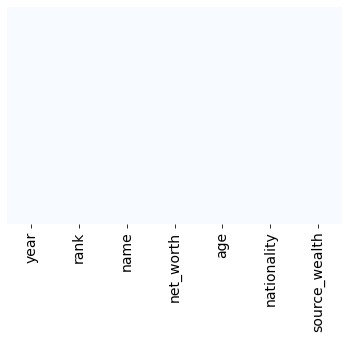

In [ ]:
# Check if I have non null values
sns.heatmap(billionaires_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

In [ ]:
# Using .dtypes() to check data types
print(billionaires_df.dtypes)

year               int64
rank               int64
name              object
net_worth        float64
age                int64
nationality       object
source_wealth     object
dtype: object


In [ ]:
# Using .info() to provide a concise summary of Dataset
billionaires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           200 non-null    int64  
 1   rank           200 non-null    int64  
 2   name           200 non-null    object 
 3   net_worth      200 non-null    float64
 4   age            200 non-null    int64  
 5   nationality    200 non-null    object 
 6   source_wealth  200 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [ ]:
# Let's check the count
billionaires_df.shape

(200, 7)

In [ ]:
# Let's see if I have duplicated entries in the data
billionaires_df.duplicated().sum()

0

In [ ]:
# Using .describe() to provide full summary statistics
billionaires_df.describe()

,year,rank,net_worth,age
count,200.000000,200.000000,200.000000,200.000000
mean,2011.500000,5.405000,47.320000,66.475000
std,5.780751,2.801825,27.063424,13.899112
min,2002.000000,1.000000,16.100000,31.000000
25%,2006.750000,3.000000,25.900000,55.000000
50%,2011.500000,5.500000,42.000000,69.000000
75%,2016.250000,8.000000,60.000000,77.000000
max,2021.000000,10.000000,177.000000,92.000000


- The maximum of net worth is 177
- The minimum of net worth is 16.1
- The mean value of the net worth is 47.32 
- The minimum age is 31, and the maximum age is 92

In [ ]:
# Calculate the variance of net worth
billionaires_df['net_worth'].var()

732.4289447236183

In [ ]:
# Calculate the median of net worth
billionaires_df['net_worth'].median()

42.0

In [ ]:
# Let's group by the year
billionaires_df_by_year = billionaires_df.groupby('year')
billionaires_df_by_year.describe()

rank                            ...   age                          
     count mean       std  min   25%  ...   min    25%   50%    75%   max
year                                  ...                                
2002  10.0  5.5  3.027650  1.0  3.25  ...  35.0  43.25  51.0  66.00  80.0
2003  10.0  5.2  2.616189  1.0  3.25  ...  46.0  53.25  56.5  67.75  82.0
2004  10.0  4.5  1.900292  1.0  3.25  ...  47.0  52.00  57.0  69.75  84.0
2005  10.0  5.5  3.027650  1.0  3.25  ...  49.0  52.50  60.5  71.75  85.0
2006  10.0  5.5  3.027650  1.0  3.25  ...  49.0  53.50  61.5  76.50  82.0
2007  10.0  5.5  3.027650  1.0  3.25  ...  49.0  56.50  69.0  75.25  80.0
2008  10.0  5.5  3.027650  1.0  3.25  ...  40.0  51.25  62.5  76.75  88.0
2009  10.0  5.5  3.027650  1.0  3.25  ...  52.0  59.50  71.0  81.75  89.0
2010  10.0  5.5  3.027650  1.0  3.25  ...  53.0  55.50  63.5  73.00  90.0
2011  10.0  5.5  3.027650  1.0  3.25  ...  53.0  56.25  62.0  69.75  80.0
2012  10.0  5.5  3.027650  1.0  3.25  ...  55.0  63.25  69.5  79.50  92.0
2013  10.0  5.4  2.988868  1.0  3.25  ...  57.0  69.00  74.5  80.75  90.0
2014  10.0  5.4  2.988868  1.0  3.25  ...  58.0  66.25  73.5  77.75  83.0
2015  10.0  5.4  2.988868  1.0  3.25  ...  59.0  67.00  74.5  78.75  92.0
2016  10.0  5.4  2.875181  1.0  3.25  ...  31.0  62.75  74.5  78.25  85.0
2017  10.0  5.4  2.913570  1.0  3.25  ...  32.0  63.75  75.5  79.25  86.0
2018  10.0  5.4  2.913570  1.0  3.25  ...  33.0  63.75  75.0  80.25  87.0
2019  10.0  5.5  3.027650  1.0  3.25  ...  34.0  57.00  72.0  78.50  88.0
2020  10.0  5.5  3.027650  1.0  3.25  ...  35.0  65.50  71.0  76.50  89.0
2021  10.0  5.5  3.027650  1.0  3.25  ...  36.0  48.25  60.0  70.25  90.0

[20 rows x 24 columns]

In [ ]:
# Calculate the mean of net worth and age for every year, using group by
billionaires_df_by_year[['net_worth', 'age']].mean()

,net_worth,age
year,,
2002,27.52,55.0
2003,26.63,60.8
2004,25.50,61.6
2005,26.22,62.8
2006,27.74,64.3
2007,34.35,65.9
2008,42.60,63.8
2009,25.39,70.6
2010,34.22,66.0


- For 2004: the mean of net worth is 25.5 and its age is 61.6
- For 2012: the mean of net worth is 39.54 and its age is 70.8
- For 2020: the mean of net worth is 68.64 and its age is 69.2
- etc.

In [ ]:
# Calculate the median of net worth and age for every year, using group by
billionaires_df_by_year[['net_worth', 'age']].median()

,net_worth,age
year,,
2002,20.00,51.0
2003,22.15,56.5
2004,20.50,57.0
2005,23.35,60.5
2006,22.75,61.5
2007,29.25,69.0
2008,42.50,62.5
2009,21.75,71.0
2010,28.35,63.5


- For 2005: the median of net worth is 23.35 and its age is 60.5
- For 2015: the median of net worth is 48.6 and its age is 74.5
- For 2021: the median of net worth is 96.5 and its age is 60
- etc.

## ***Descriptive Statistical Analysis: Using "value counts" to count each feature***

In [ ]:
# Count the variable of the year
billionaires_df['year'].value_counts()

2021    10
2020    10
2003    10
2004    10
2005    10
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
2018    10
2019    10
2002    10
Name: year, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
year_counts = billionaires_df['year'].value_counts().to_frame()
year_counts.rename(columns = {'year': 'value_counts'}, inplace = True)
year_counts.index.name = 'year'
year_counts

,value_counts
year,
2021,10
2020,10
2003,10
2004,10
2005,10
2006,10
2007,10
2008,10
2009,10


Every year, from 2002 to 2021, here is the firsts ten people becoming billionaires

In [ ]:
# Count the variable of the rank
billionaires_df['rank'].value_counts()

6     27
8     23
5     20
4     20
3     20
2     20
1     20
10    17
9     17
7     16
Name: rank, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
rank_counts = billionaires_df['rank'].value_counts().to_frame()
rank_counts.rename(columns = {'rank': 'value_counts'}, inplace = True)
rank_counts.index.name = 'rank'
rank_counts

,value_counts
rank,
6,27
8,23
5,20
4,20
3,20
2,20
1,20
10,17
9,17


- Number of billionaires people that took the 1st place is 20
- Number of billionaires people that took the 2nd place is 20
- Number of billionaires people that took the 3rd place is 20
- Number of billionaires people that took the 4th place is 20
- Number of billionaires people that took the 5th place is 20
- Number of billionaires people that took the 6th place is 27
- Number of billionaires people that took the 7th place is 16
- Number of billionaires people that took the 8th place is 23
- Number of billionaires people that took the 9th place is 17
- Number of billionaires people that took the 10th place is 17

In [ ]:
# Count the variable of the name
billionaires_df['name'].value_counts()

Bill Gates                      20
Warren Buffett                  19
Larry Ellison                   16
Amancio Ortega                  13
Carlos Slim                     10
Bernard Arnault                  8
Lakshmi Mittal                   7
Charles Koch                     6
David Koch                       6
Jeff Bezos                       6
Mark Zuckerberg                  6
Paul Allen                       5
Karl Albrecht                    5
Carlos Slim & family             5
Ingvar Kamprad                   5
Mukesh Ambani                    5
Al-Waleed bin Talal              4
Li Ka-shing                      4
Jim Walton                       3
Michael Bloomberg                3
Eike Batista                     3
S. Robson Walton                 3
Helen Walton*                    2
Kenneth Thomson                  2
S. Robson Walton*                2
Bernard Arnault & family         2
Karl and Theo Albrecht           2
Sheldon Adelson                  2
Alice Walton*       

In [ ]:
# Save the results to the dataframe and Rename the index
name_counts = billionaires_df['name'].value_counts().to_frame()
name_counts.rename(columns = {'name': 'value_counts'}, inplace = True)
name_counts.index.name = 'name'
name_counts

,value_counts
name,
Bill Gates,20
Warren Buffett,19
Larry Ellison,16
Amancio Ortega,13
Carlos Slim,10
Bernard Arnault,8
Lakshmi Mittal,7
Charles Koch,6
David Koch,6


- 20 time, Bill Gates becomes billionaire from 2002 to 2021
- 16 time, Larry Ellison becomes billionaire from 2002 to 2021
- 6 time, Charles Koch becomes billionaire from 2002 to 2021
- 3 time, Michael Bloomberg becomes billionaire from 2002 to 2021
- 1 time, Christy Walton becomes billionaire from 2002 to 2021
- etc.

In [ ]:
# Count the variable of the net_worth
billionaires_df['net_worth'].value_counts()

20.0     9
30.0     5
28.0     4
40.0     4
60.0     4
        ..
75.6     1
18.5     1
60.8     1
77.1     1
177.0    1
Name: net_worth, Length: 137, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
net_worth_counts = billionaires_df['net_worth'].value_counts().to_frame()
net_worth_counts.rename(columns = {'net_worth': 'value_counts'}, inplace = True)
net_worth_counts.index.name = 'net_worth'
net_worth_counts

,value_counts
net_worth,
20.0,9
30.0,5
28.0,4
40.0,4
60.0,4
...,...
75.6,1
18.5,1
60.8,1


- 9 billionaires have about 20 Billions of Dollars amounts
- 5 billionaires have about 30 Billions of Dollars amounts
- 4 billionaires have about 60 Billions of Dollars amounts
- 1 billionaire has about 1 Billion of Dollars amounts
- etc.

In [ ]:
# Count the variable of the age
billionaires_df['age'].value_counts()

77    9
53    7
74    7
73    6
80    6
57    6
71    6
75    6
76    6
79    6
55    6
82    6
49    6
78    5
56    5
84    5
58    5
54    5
60    5
70    5
66    5
81    4
65    4
52    4
72    4
63    4
51    3
69    3
47    3
64    3
90    3
62    3
61    3
48    3
83    3
43    2
35    2
92    2
68    2
85    2
87    2
89    2
67    2
88    2
59    1
36    1
32    1
33    1
34    1
44    1
40    1
45    1
46    1
86    1
50    1
31    1
Name: age, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
age_counts = billionaires_df['age'].value_counts().to_frame()
age_counts.rename(columns = {'age': 'value_counts'}, inplace = True)
age_counts.index.name = 'age'
age_counts

,value_counts
age,
77,9
53,7
74,7
73,6
80,6
57,6
71,6
75,6
76,6


- 9 billionaires are 77 years old
- 5 billionaires are 66 years old
- 3 billionaires are 51 years old
- 1 billionaire is 86 years old
- etc.

In [ ]:
# Count the variable of the nationality
billionaires_df['nationality'].value_counts()

United States    115
Mexico            15
India             14
Spain             13
France            12
Germany            9
Sweden             6
Hong Kong          4
Saudi Arabia       4
Brazil             3
Canada             3
Japan              1
Russia             1
Name: nationality, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
nationality_counts = billionaires_df['nationality'].value_counts().to_frame()
nationality_counts.rename(columns = {'nationality': 'value_counts'}, inplace = True)
nationality_counts.index.name = 'nationality'
nationality_counts

,value_counts
nationality,
United States,115
Mexico,15
India,14
Spain,13
France,12
Germany,9
Sweden,6
Hong Kong,4
Saudi Arabia,4


- 115 billionaires have a nationality of United States
- 12 billionaires have a nationality of France
- 9 billionaires have a nationality of Germany
- 1 billionaire has a nationality of Japan
- etc.

In [ ]:
# Count the variable of the source_wealth
billionaires_df['source_wealth'].value_counts()

Microsoft                                  25
Berkshire Hathaway                         20
Oracle Corporation                         16
América Móvil, Grupo Carso                 15
Koch Industries                            12
Wal-Mart                                   11
Walmart                                     9
Aldi Süd                                    7
Inditex Group                               6
Amazon                                      6
Facebook                                    6
LVMH                                        6
Arcelor Mittal                              5
IKEA                                        5
Reliance Industries                         5
Inditex, Zara                               4
LVMH Moët Hennessy • Louis Vuitton          4
Kingdom Holding Company                     4
EBX Group                                   3
Bloomberg L.P.                              3
Alphabet Inc.                               3
Inditex                           

In [ ]:
# Save the results to the dataframe and Rename the index
source_wealth_counts = billionaires_df['source_wealth'].value_counts().to_frame()
source_wealth_counts.rename(columns = {'source_wealth': 'value_counts'}, inplace = True)
source_wealth_counts.index.name = 'source_wealth'
source_wealth_counts

,value_counts
source_wealth,
Microsoft,25
Berkshire Hathaway,20
Oracle Corporation,16
"América Móvil, Grupo Carso",15
Koch Industries,12
Wal-Mart,11
Walmart,9
Aldi Süd,7
Inditex Group,6


- 25 billionaires are come from Microsoft company
- 16 billionaires are come from Oracle Corporation
- 6 billionaires are come from Amazon
- 3 billionaires are come from Bloomberg L.P.
- etc.

## ***Let's work with some potential outliers***

In [ ]:
# Display the first 15 columns of year, rank, net worth and age
billionaires_df[['year', 'rank', 'net_worth', 'age']].head(15)

,year,rank,net_worth,age
0,2021,1,177.0,57
1,2021,2,151.0,49
2,2021,3,150.0,72
3,2021,4,124.0,65
4,2021,5,97.0,36
5,2021,6,96.0,90
6,2021,7,93.0,76
7,2021,8,91.5,48
8,2021,9,89.0,47
9,2021,10,84.5,63


In [ ]:
# Let's display the 115 billioniares with a nationality of united states
billionaires_df.nationality == 'United States'
billionaires_unitedstates_df = billionaires_df.nationality == 'United States'
billionaires_df[billionaires_unitedstates_df]

,year,rank,name,net_worth,age,nationality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX"
3,2021,4,Bill Gates,124.0,65,United States,Microsoft
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook
5,2021,6,Warren Buffett,96.0,90,United States,Berkshire Hathaway
...,...,...,...,...,...,...,...
191,2002,2,Larry Ellison,47.0,55,United States,Oracle Corporation
192,2002,3,Paul Allen,28.0,47,United States,Microsoft
193,2002,4,Warren Buffett,25.6,69,United States,Berkshire Hathaway
196,2002,7,S. Robson Walton,20.0,57,United States,Wal-Mart


Here is the dataset of all the 115 billionaires of the nationality of United States of America

In [ ]:
# Display billionaire Bill Gates from 2002 - 2021
billionaires_billgates_df = billionaires_df[(billionaires_df['name'] == 'Bill Gates')]
billionaires_billgates_df

,year,rank,name,net_worth,age,nationality,source_wealth
3,2021,4,Bill Gates,124.0,65,United States,Microsoft
11,2020,2,Bill Gates,98.0,64,United States,Microsoft
21,2019,2,Bill Gates,96.5,63,United States,Microsoft
31,2018,2,Bill Gates,90.0,62,United States,Microsoft
40,2017,1,Bill Gates,86.0,61,United States,Microsoft
50,2016,1,Bill Gates,75.0,60,United States,Microsoft
60,2015,1,Bill Gates,79.2,59,United States,Microsoft
70,2014,1,Bill Gates,76.0,58,United States,Microsoft
81,2013,2,Bill Gates,67.0,57,United States,Microsoft
91,2012,2,Bill Gates,61.0,56,United States,Microsoft


Here is the dataset of the billionaire Bill Gates from 2002 to 2021

In [ ]:
# Display billionaire Jeff Bezos dataframe from 2002 - 2021
billionaires_df.name == 'Jeff Bezos'
billionaires_name_df = billionaires_df.name == 'Jeff Bezos'
billionaires_df[billionaires_name_df]

,year,rank,name,net_worth,age,nationality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
10,2020,1,Jeff Bezos,113.0,56,United States,Amazon
20,2019,1,Jeff Bezos,131.0,55,United States,Amazon
30,2018,1,Jeff Bezos,112.0,54,United States,Amazon
42,2017,3,Jeff Bezos,72.8,53,United States,Amazon
54,2016,5,Jeff Bezos,45.2,52,United States,Amazon


Here is the dataset of the billionaire Jeff Bezos from 2002 to 2021

In [ ]:
# Billionaires who have occupied the first place over the years
billionaires_first_place_df = billionaires_df[(billionaires_df['rank'] == 1)]
billionaires_first_place_df

,year,rank,name,net_worth,age,nationality,source_wealth
0,2021,1,Jeff Bezos,177.0,57,United States,Amazon
10,2020,1,Jeff Bezos,113.0,56,United States,Amazon
20,2019,1,Jeff Bezos,131.0,55,United States,Amazon
30,2018,1,Jeff Bezos,112.0,54,United States,Amazon
40,2017,1,Bill Gates,86.0,61,United States,Microsoft
50,2016,1,Bill Gates,75.0,60,United States,Microsoft
60,2015,1,Bill Gates,79.2,59,United States,Microsoft
70,2014,1,Bill Gates,76.0,58,United States,Microsoft
80,2013,1,Carlos Slim & family,73.0,73,Mexico,"América Móvil, Grupo Carso"
90,2012,1,Carlos Slim & family,69.0,72,Mexico,"América Móvil, Grupo Carso"


- ***Jeff Bezos*** has occupied the first place in the years of 2018, 2019, 2020, 2021; so 4 times
- ***Bill Gates*** has occupied the first place in the years of 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2014, 2015, 2016, 2017; so 11 times
- ***Carlos Slim & family*** has occupied the first place in the years of 2010, 2011, 2012, 2013; so 4 times
- ***Warren Buffett*** has occupied the first place in the year of 2008; ONLY 1 time

In [ ]:
# DataFrame of Billionaires who's ages are less than 50, and with net_worth more than 60
billionaires_df[(billionaires_df['net_worth'] > 60) & (billionaires_df['age'] < 50)]

,year,rank,name,net_worth,age,nationality,source_wealth
1,2021,2,Elon Musk,151.0,49,United States,"Tesla, SpaceX"
4,2021,5,Mark Zuckerberg,97.0,36,United States,Facebook
7,2021,8,Larry Page,91.5,48,United States,Alphabet Inc.
8,2021,9,Sergey Brin,89.0,47,United States,Alphabet Inc.
27,2019,8,Mark Zuckerberg,62.3,34,United States,Facebook
34,2018,5,Mark Zuckerberg,71.0,33,United States,Facebook


These 4 people billionaires of the nationality United States, who are less than 50 years old, have more than 60 Billions as their net worth

## ***Visualizations***

In [ ]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,4

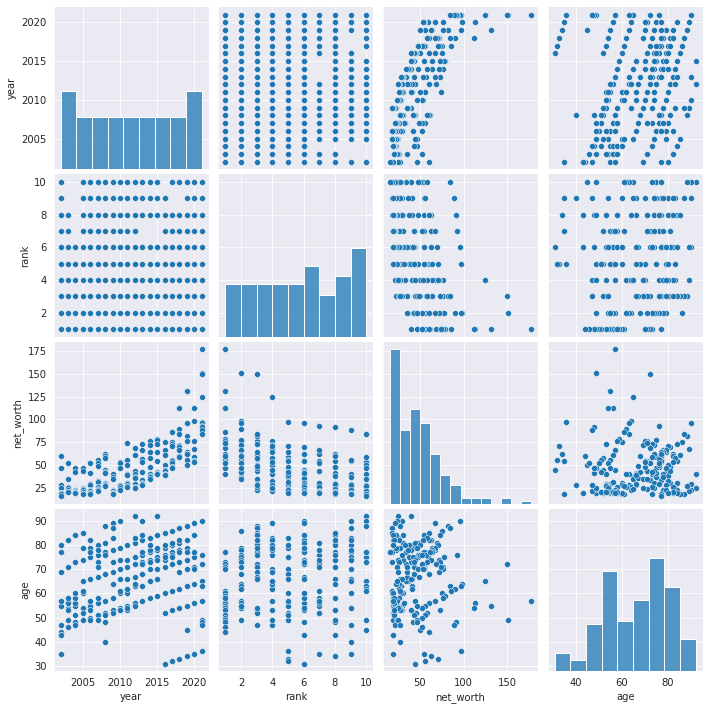

In [ ]:
# Plot the pairplot of the billionaires
sns.set_style('darkgrid')
sns.pairplot(billionaires_df, vars = ['year', 'rank', 'net_worth', 'age']);

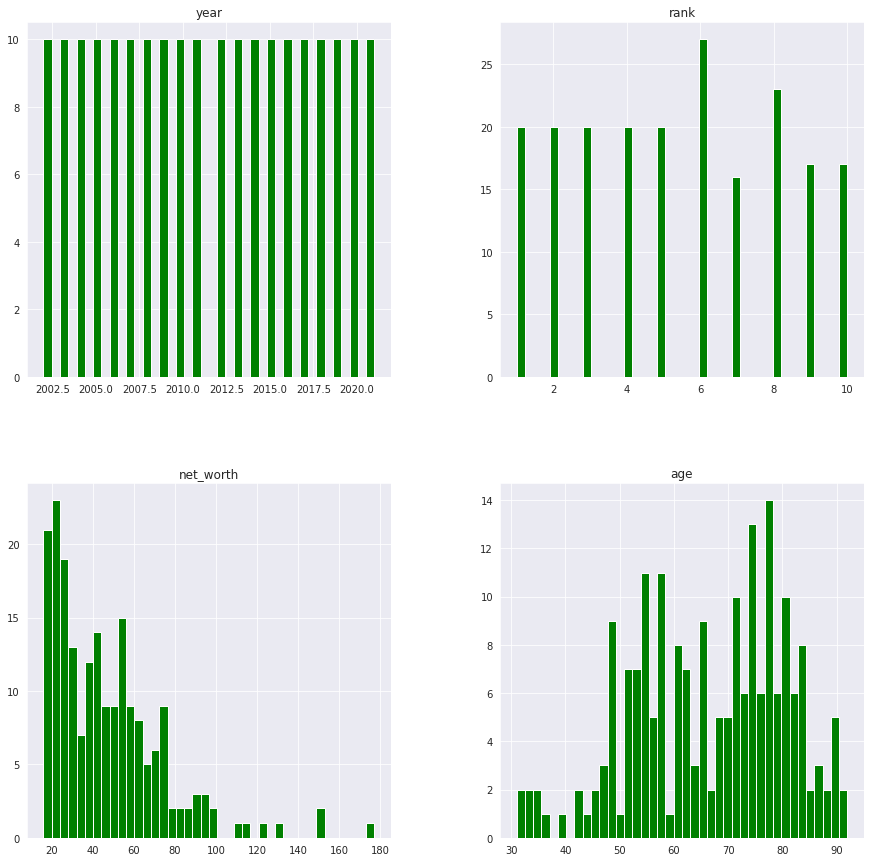

In [ ]:
# Histogram of the billionaires
sns.set_style('darkgrid')
billionaires_df.hist(figsize=(15, 15), bins = 40, color = 'Green');

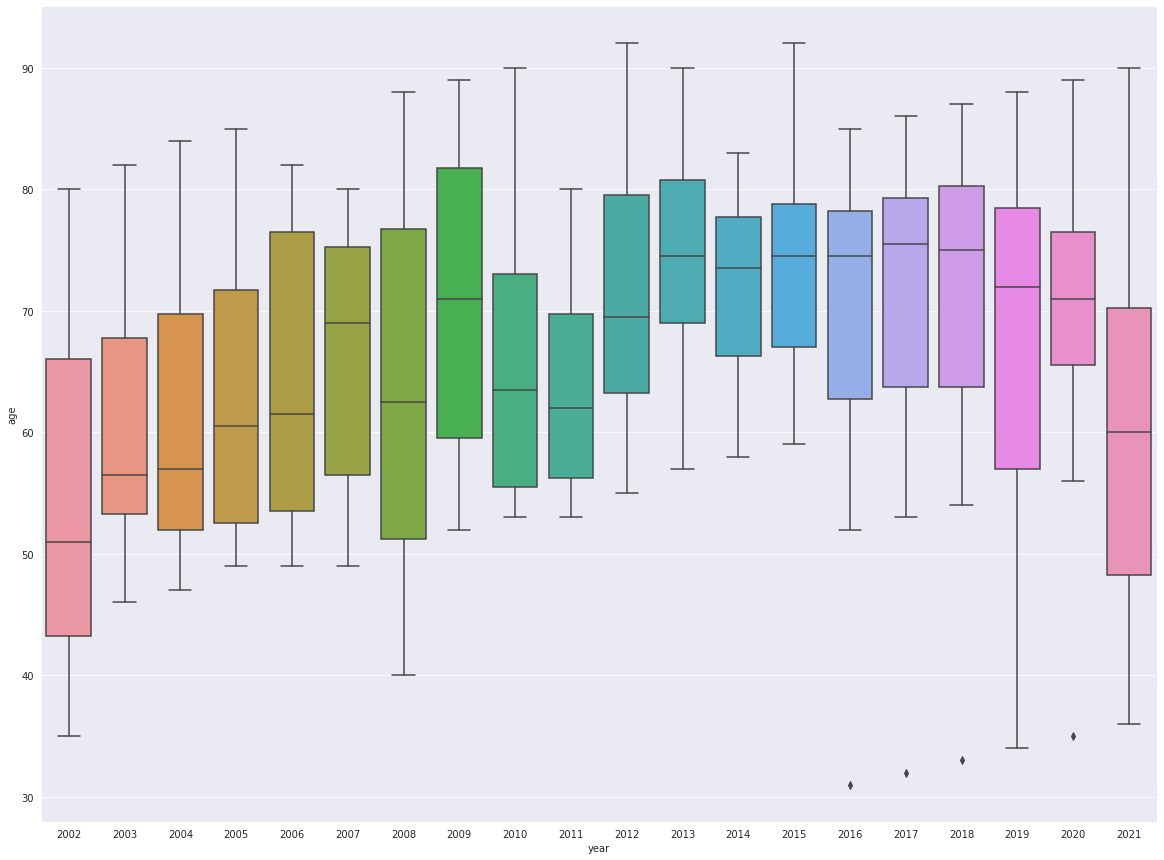

In [ ]:
# Boxplots with age and year
sns.boxplot(data = billionaires_df, x = 'year', y = 'age');

rcParams['figure.figsize'] = 20,15
plt.show()

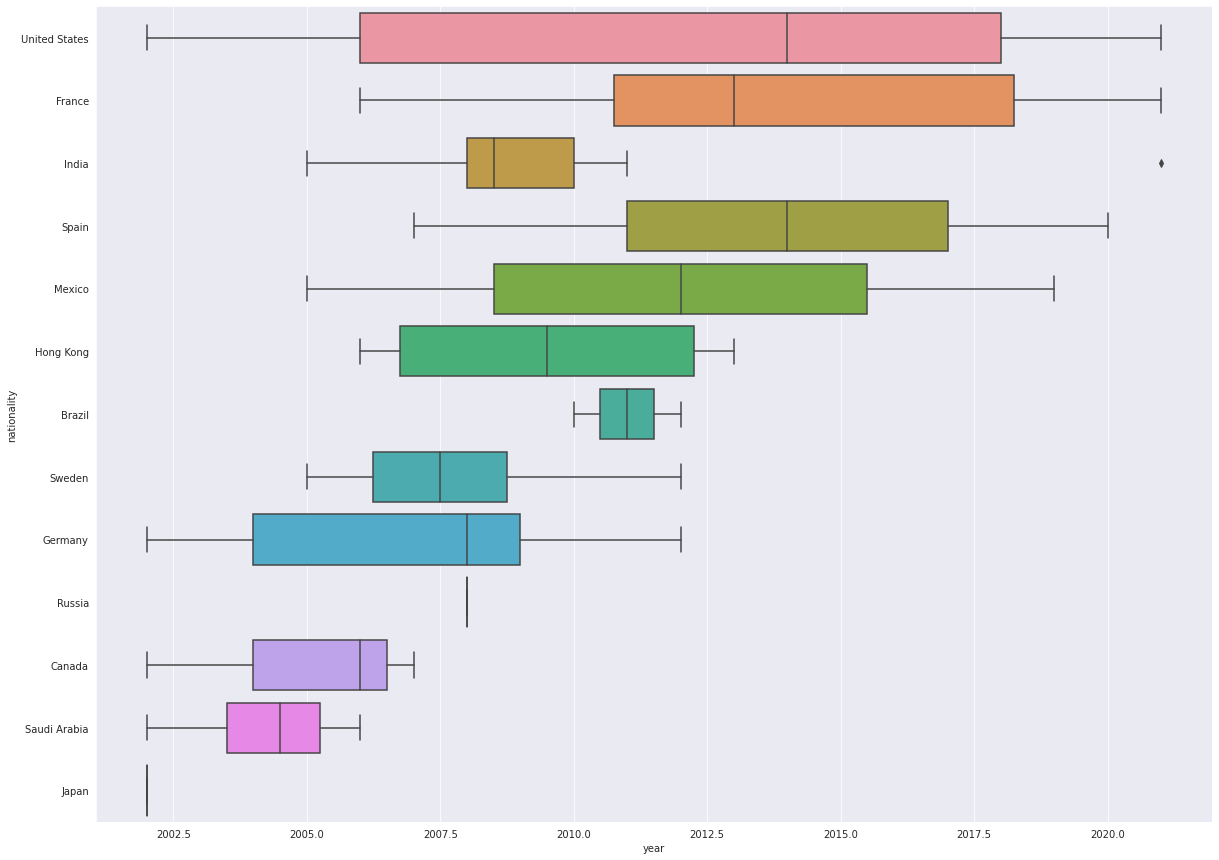

In [ ]:
## Boxplots with nationality and year
sns.boxplot(data = billionaires_df, x = 'year', y = 'nationality');

rcParams['figure.figsize'] = 20,15
plt.show()

Text(0.5, 1.0, 'BILLIONAIRES NET WORTH')

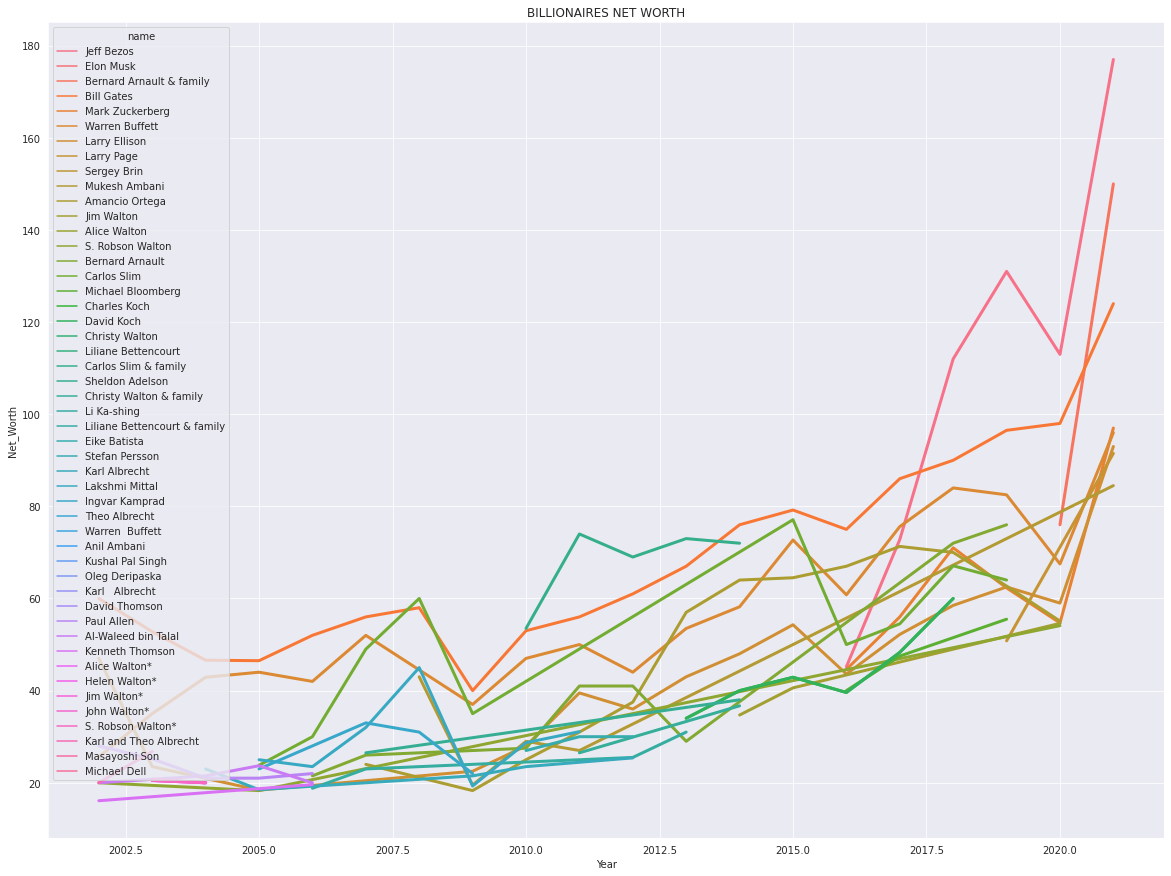

In [ ]:
sns.lineplot(data = billionaires_df, x ='year', y ='net_worth', hue ='name', linewidth = 3);

plt.xlabel('Year')
plt.ylabel('Net_Worth')
plt.title('BILLIONAIRES NET WORTH')

Net Worth Evolution Of every billionaire over the time

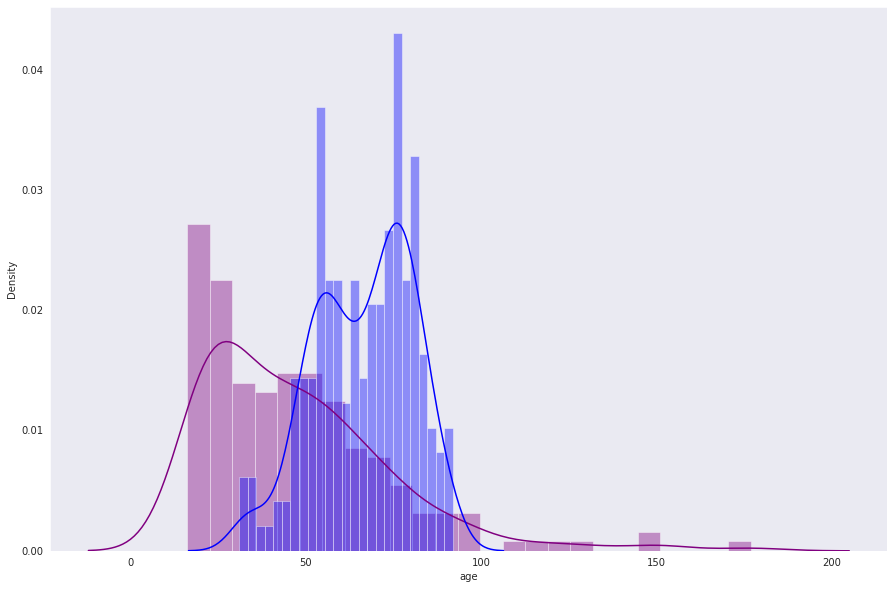

In [ ]:
# Plot the distplot for the net worth and the age
plt.figure(figsize=(15, 10))
sns.distplot(billionaires_df['net_worth'], bins = 25, color = 'purple')
sns.distplot(billionaires_df['age'], bins = 25, color = 'blue')
plt.grid()

The distribution of the net worth and the age of the Billionaires over the time

Text(0.5, 1.0, 'BILLIONAIRES FIRST PLACE')

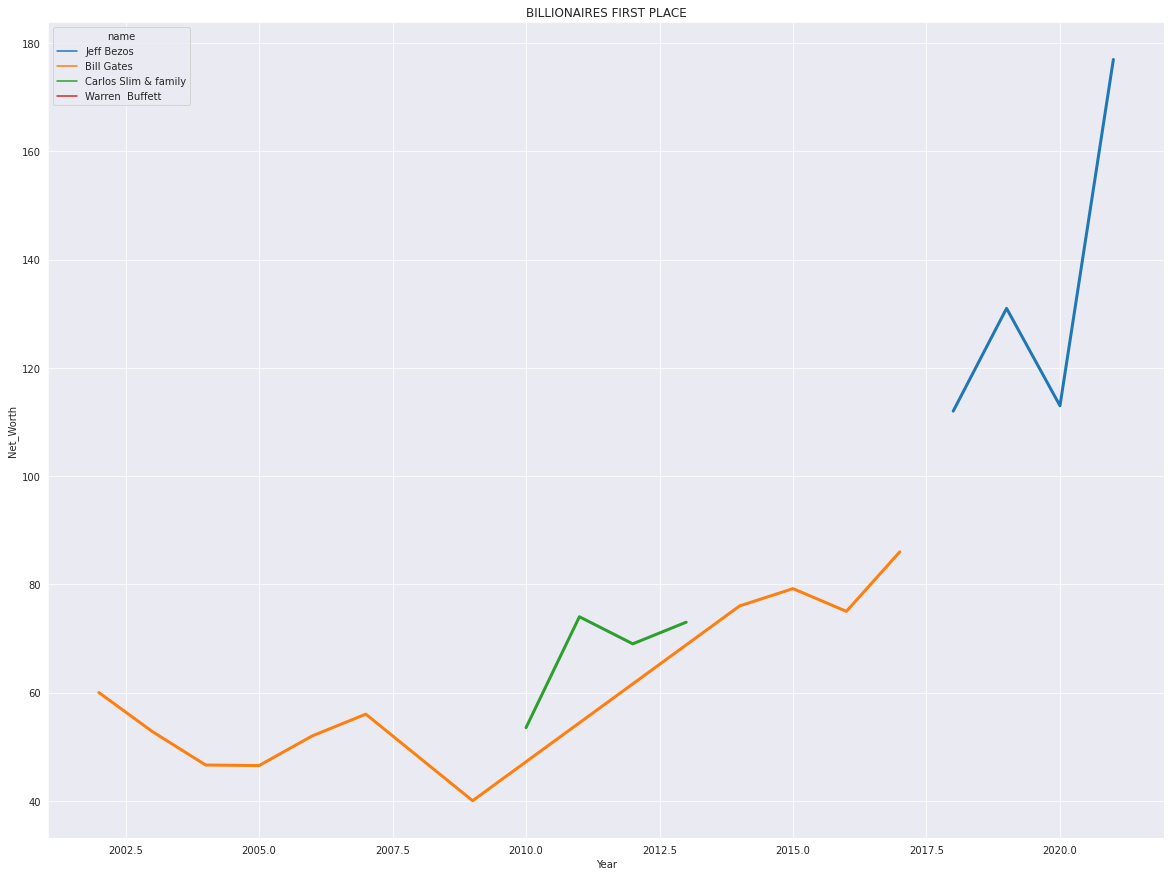

In [ ]:
# Billionaires who have occupied the first place over the years
sns.lineplot(data = billionaires_first_place_df, x ='year', y ='net_worth', hue ='name', linewidth = 3);

plt.xlabel('Year')
plt.ylabel('Net_Worth')
plt.title('BILLIONAIRES FIRST PLACE')

- The line for Warren Buffett can not be seen, since he ONLY occupied the first place one time in 2008
- Jeff Bezos started becoming first in 2018 with a high net worth
- Bill Gates is the one's who had become fisrt several time in the years of 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2014, 2015, 2016, 2017
- Carlos Slim & family from 2010 to 2013, became first

In [ ]:
correlations = billionaires_df.corr()

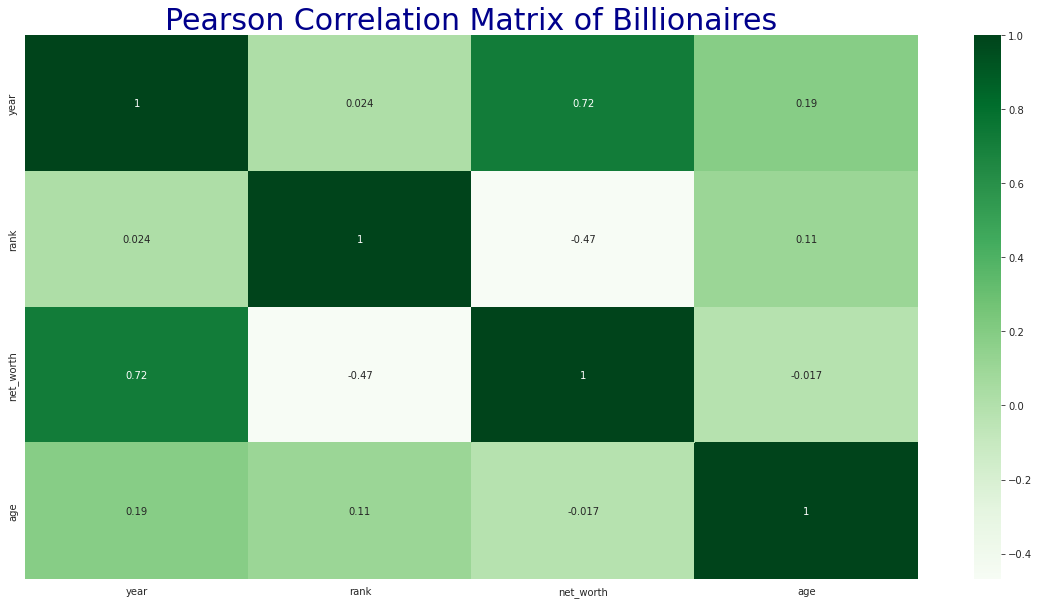

In [ ]:
# Correlation Matrix between the Billionaires
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, cmap ='Greens', annot = True)
plt.title('Pearson Correlation Matrix of Billionaires', fontsize = 30, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show();

- There is a strong correlation of 0.72 between ***net worth and year***, which correlation is close to 1, means that there is a large positive relationship.
- There is a correlation of -0.47 between ***net worth and rank***, which correlation is close to 0, means that there is no relationship.